# Quick check at BL 6.3.1

for quick checks of XMCD/XLD and hysteresis loops, 

if you want to use this notebook, please work in a copy at the BL computer

- if needed: get recent update of [xaspy](https://github.com/gnzng/xaspy), restart kernel after update, or set xaspy to specific version
- make sure to use cell magic by adding the "%" in front

In [1]:
#%pip install xaspy -U
#%pip install xaspy==0.2.1

- get the version number and more information of the xaspy module

In [6]:
import xaspy 
print(xaspy.info())

name: 	 xaspy
updated: 	 2022-07-22
version: 	 0.3.1
authors: 	 Damian Guenzing|damian.guenzing@uni-due.de
	Alpha T. N'Diaye|atndiaye@lbl.gov


import important modules:

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle

#from xaspy.xas import xas,XMCD,mHYST,linprebkg,smooth,backgrounds
from xaspy.xas import xas,backgrounds
from xaspy.xas.polarized import XMCD,mHYST
from xaspy.xas.backgrounds import smooth

## switch to local paths
if you dont run this notebook on the beam line computer at BL 6.3.1, use the next lines of code to specify the path to the scans on your local machine. All collected scans for one beam time should be organized in one folder. 

restart kernel after changing localpath

In [12]:
on_bl_computer = True
localpath = '../xaspy/test_files/'



##########################################
#import read in function from xaspy package:

from xaspy.beamlines.bl631 import (TrajScan,
                                SigScan
                                )

if on_bl_computer != True:
    TrajScan.path = localpath
    SigScan.path = localpath

if on_bl_computer == True:
    
    from xaspy.beamlines.bl631 import TS_indexing, SS_indexing
    
    #index all scans 
    pickle.dump(SS_indexing(),open("_SS_index.p","wb"))
    pickle.dump(TS_indexing(),open("_TS_index.p","wb"))

## import function for files

e.g. 
for Trajectory Scans:

`TrajScan('31039-006_0006').df` for pandas dataframe (df)

In [4]:
print("content of scan as pandas-dataframe:")
TrajScan('31039-006_0006').df

content of scan as pandas-dataframe:


,Time of Day,Time (s),Z,Magnet Field,Energy,Beam Current,Aalborg Totalizer,I0 ES,EY,Counter 2,...,Hall Probe 4,Gate,Magnet Resistance,Raw Magnet Voltage,Raw Magnet Current,Magnet Voltage,Magnet Current,Source Meter Current,Source Meter Voltage,Sample Bias
0,07:42:14,735.416992,88.80043,0.4,860.000000,500.149658,0.0,3843.0,6679.0,1.0,...,NaN,0.0,0.611884,4.740988,7.655937,4.670649,7.652590,0.0,0.0,0.0
1,07:42:14,735.416992,88.80043,0.4,860.099976,500.145508,0.0,3961.0,6885.0,0.0,...,NaN,0.0,0.611798,4.740602,7.656044,4.665987,7.651694,0.0,0.0,0.0
2,07:42:14,735.416992,88.80043,0.4,860.200012,500.141357,0.0,3836.0,6664.0,1.0,...,NaN,0.0,0.611751,4.740216,7.656151,4.663442,7.651205,0.0,0.0,0.0
3,07:42:14,735.416992,88.80043,0.4,860.299988,500.135864,0.0,3978.0,6909.0,0.0,...,NaN,0.0,0.611713,4.739830,7.656259,4.661324,7.650798,0.0,0.0,0.0
4,07:42:14,735.416992,88.80043,0.4,860.400024,500.127563,0.0,3996.0,6948.0,1.0,...,NaN,0.0,0.611689,4.739445,7.656365,4.660052,7.650554,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,07:43:21,802.247009,88.80043,-0.4,919.599976,499.946259,0.0,3652.0,6211.0,0.0,...,NaN,0.0,0.608771,-4.482780,-7.591402,-4.550640,-7.648371,0.0,0.0,0.0
1198,07:43:21,802.247009,88.80043,-0.4,919.700012,499.944000,0.0,3760.0,6396.0,1.0,...,NaN,0.0,0.608771,-4.482748,-7.591268,-4.550640,-7.648371,0.0,0.0,0.0
1199,07:43:21,802.247009,88.80043,-0.4,919.799988,499.944000,0.0,3796.0,6452.0,0.0,...,NaN,0.0,0.608771,-4.482716,-7.591134,-4.550640,-7.648371,0.0,0.0,0.0
1200,07:43:21,802.247009,88.80043,-0.4,919.900024,499.940552,0.0,3672.0,6243.0,1.0,...,NaN,0.0,0.608771,-4.482684,-7.591000,-4.550640,-7.648371,0.0,0.0,0.0


## spectra quick check

- use cell magic "matplotlib inline" for static plots and "matplotlib widget" for interactive plots

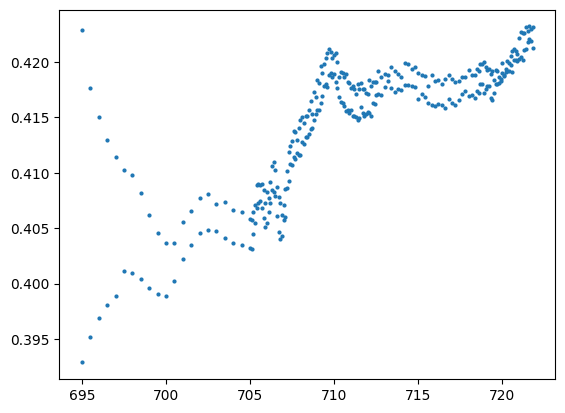

In [5]:
%matplotlib inline

df = TrajScan('31920').df
#df = SigScan('52877').df

plt.scatter(df["Energy"], df["EY"]/df["Clock"],s=4)

#print(df["Z"])

## XMCD quick check

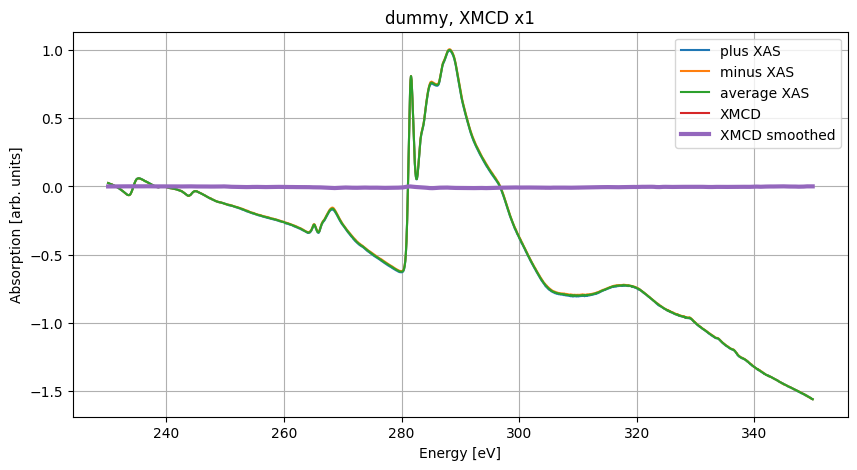

In [6]:
%matplotlib inline
main_nr1 = 31925 #

#tomerge = [
#    '{}'.format(main_nr1),
   # '{}_0002'.format(main_nr1),
   # '{}_0003'.format(main_nr1),
#    '{}_0004'.format(main_nr1),
#    '{}_0005'.format(main_nr1),
 #   '{}_0006'.format(main_nr1),
  #  '{}_0007'.format(main_nr1),
  #  '{}_0008'.format(main_nr1),
#]


tomerge = ['{}_{:04}'.format(main_nr1, n) for n in range(33,42)]

#set to True if zou want to plot the individual pairs
showall = False

plist = []
mlist = []

for n in tomerge:
    t1 = TrajScan(n).df
    # dividing the scan files by magnetic field direction
    plus = t1[t1['Magnet Field'] <= 0].reset_index()
    minus= t1[t1['Magnet Field'] >= 0].reset_index()

    plist.append(plus)
    mlist.append(minus)


# finally feed everything in the XMCD function        
xx, pxas, mxas, xas, xmcd = XMCD(plist,mlist,'Energy','EY','Clock',log=False,
                                 norm='white_line',xsize=10000)




xmcd_scaling = 1
sample = "dummy"
    
############################# OUTPUT
plt.figure(figsize=(10,5))
plt.title("{}, {}".format(sample,"XMCD x"+str(xmcd_scaling)))
plt.plot(xx, pxas,label='plus XAS')
plt.plot(xx, mxas,label='minus XAS')
plt.plot(xx, xas ,label='average XAS')
plt.plot(xx, xmcd*xmcd_scaling ,label='XMCD')
plt.plot(xx, smooth(xmcd,100)*xmcd_scaling ,label='XMCD smoothed',linewidth=3)

if showall:
    for i in range(len(plist)):
        xxi, pxasi, mxasi, xasi, xmcdi = XMCD([plist[i],], [mlist[i],],'Energy','EY','Clock',log=False,
                                              norm='white_line',xsize=10000)
#        plt.plot(xxi, xasi,label='XAS #{}'.format(i+1),alpha=0.2)
        plt.plot(xxi, xmcdi*xmcd_scaling,label='XMCD x{} #{}'.format(xmcd_scaling, i+1),alpha=0.2)

plt.xlabel('Energy [eV]')
plt.ylabel('Absorption [arb. units]')
plt.legend()
plt.grid()
plt.show()


## Hysteresis

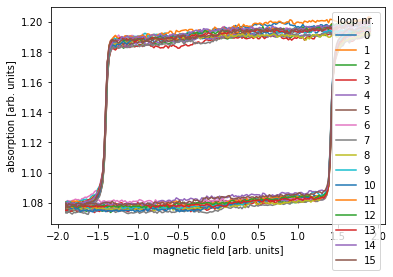

averaged loops:


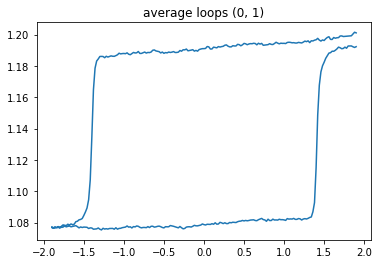

In [11]:
## choose TrajScan file here as a string
scannumber = '31914-001_0001'
df = TrajScan(scannumber).df

# adjust energy column, detector and monitor column. ene_cut: energy between the edges
hystclass = mHYST(df,'Magnet Field','Energy','LY','Clock',ratio='higher/lower')

# use onefigure=True for showing as individual plots
hystclass.plot_separated(onefigure=True)

# now average specific loops
    # return_data = False for plotting 
    # return_data = True for data as tuple for further plotting or saving
    
print('averaged loops:')
hystclass.average_loops([0,1],return_data = False)
